In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io

## Data loading

In [2]:
%run ../util/load_data.py
%run ../util/data_visualization.py
%run ../util/outliers_statistics.py

data = load_data("../data")
mat = scipy.io.loadmat('../data/cover.mat')
df = pd.DataFrame(mat['X'], columns=data['numerical_attributes'])
target = mat['y']
df['target'] = target

/Users/andrluc/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/andrluc/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


## Outlier detection 

Let's compute now the first and the third quantiles.

In [3]:
first_quantiles = df.quantile(0.25)
third_quantiles = df.quantile(0.75)

Now let's see which values are outside the 1.5 * IQR.

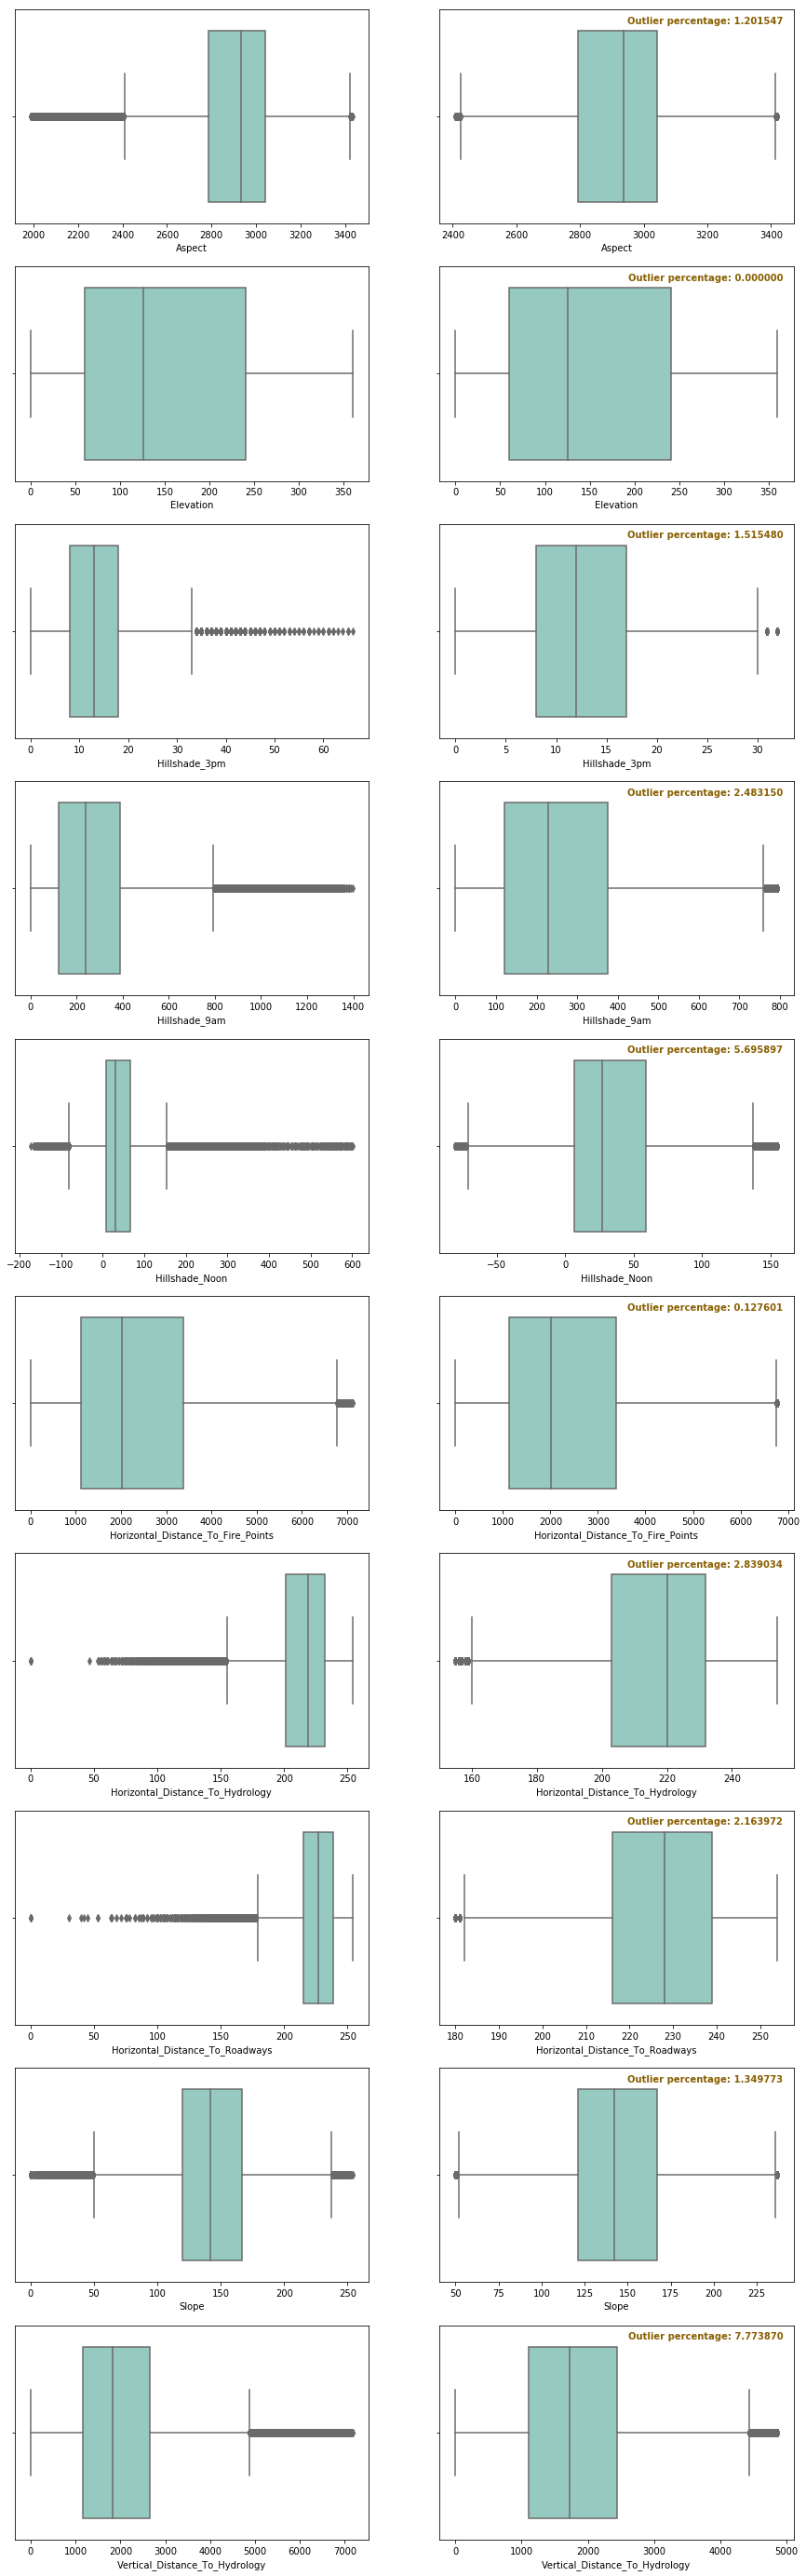

In [7]:
outlier_ids = []
_, ax = plt.subplots(nrows=10, ncols=2, figsize=(15, 50))
train_data = df

iqr_factor = 1.5

for idx, numerical_attribute in enumerate(data['numerical_attributes']):
    first_quantile = first_quantiles[numerical_attribute]
    third_quantile = third_quantiles[numerical_attribute]
    
    iqr = third_quantile - first_quantile
    
    without_outlier_df = train_data[train_data[numerical_attribute] > first_quantile - iqr_factor*iqr]
    without_outlier_df = without_outlier_df[without_outlier_df[numerical_attribute] < third_quantile + iqr_factor*iqr]
    
    outliers = train_data[~train_data.isin(without_outlier_df).all(1)]
    outlier_ids += outliers.index.values.tolist()
    outlier_percentage = 100 * len(outliers.index)/len(train_data.index)
    
    ax[idx][1].text(x=0.97, y=0.97, transform=ax[idx][1].transAxes, s="Outlier percentage: %f" % outlier_percentage,\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    
    sns.boxplot(x=numerical_attribute, data=train_data, palette="Set3", ax=ax[idx][0])
    sns.boxplot(x=numerical_attribute, data=without_outlier_df, palette="Set3", ax=ax[idx][1])
    

In [8]:
outliers = train_data[train_data.index.isin(outlier_ids)]
total_outlier_percentage = 100*len(outliers.index)/len(train_data.index)
print("Total outlier percentage: %f" % total_outlier_percentage)

target_outlier_percentage = 100 * len(train_data[train_data['target'] == 1].index.values.tolist())/len(train_data.index)
print("Target outlier percentage: %f" % target_outlier_percentage)

Total outlier percentage: 19.812060
Target outlier percentage: 0.960328


In [9]:
precision, recall, F1_score = outliers_statistics(train_data, outlier_ids)
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1-score: " + str(F1_score))

TP: 2696
FP: 53976
FN: 51
Precision: 0.047571993224167136
Recall: 0.9814342919548599
F1-score: 0.09074538447298003
